# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [106]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%pylab inline
data = pd.read_csv('orange_small_churn_data.txt', sep=',')
labels = pd.read_csv('orange_small_churn_labels.txt', header=None)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [107]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


2\. Рассчитайте доли классов `отток` и `не отток`.

In [108]:
counts = pd.value_counts(labels[0])
print ("отток: ", str(100.*counts[1]/(counts[1]+counts[-1])) + "%")
print ("не отток: ", str(100.*counts[-1]/(counts[1]+counts[-1])) + "%")

отток:  7.44%
не отток:  92.56%


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [109]:
#Разбиваю на числовые и категориальные признаки
num_data = data.iloc[:,:190]   
num_data['labels'] = labels
cat_data = data.iloc[:,190:]   
cat_data['labels'] = labels

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [110]:
#В данном случае мера взаимосвязи рассчитывается с помощью разницы матожиданий.
# Ссылка на видео: https://www.coursera.org/learn/stats-for-data-analysis/lecture/prX3S/korrieliatsiia-met-iusa-i-koeffitsiient-kramiera

def corr_math(df, name_feature, temp):
    values = temp.iloc[:,0]
    labels = temp.iloc[:,1]
    cor = 0
    mean_val_true = np.mean(values[labels == 1])
    mean_val_false = np.mean(values[labels == -1])
    count_val_true = len(values[labels==1])
    count_val_false = len(values[labels==-1])
#корреляция посчитана только для признаков, положительных классов которых больше 250 (меньше пропусков), а также взята по модулю, чтобы удобно было выбрать топ 20    
    if (mean_val_true == 0) or (mean_val_false==0) or (len(values[labels == 1])<250):
        corr = 0
    else:
        corr = abs(mean_val_true) - abs(mean_val_false)
        df.loc[len(correlations)] = [name_feature, abs(corr), count_val_true, count_val_false]
    return df

In [111]:
#Создание файла с данными корреляций
correlations = pd.DataFrame(columns = ['feature', 'corr', 'count 1', 'count -1'])
for i in range(len(num_data.loc[0,:])-1):       
    temp = num_data[['Var'+str(i+1),'labels']].dropna()
    correlations = corr_math(correlations,'Var'+ str(i+1), temp)

In [112]:
#Отсортирую в порядке убывания корреляций
correlations = correlations.dropna()
correlations.sort_values(['corr'], ascending=False, inplace=True)
correlations.head(10)

,feature,corr,count 1,count -1
24,Var113,162842.184538,2976,37024
36,Var153,151453.351963,2789,33195
9,Var38,77671.003559,2789,33195
16,Var76,56780.681291,2789,33195
35,Var149,29536.673807,2575,31609
31,Var134,14942.720027,2789,33195
18,Var81,14379.562165,2759,32806
30,Var133,12389.653531,2789,33195
38,Var163,10475.285968,2789,33195
21,Var94,9689.091445,1591,20472


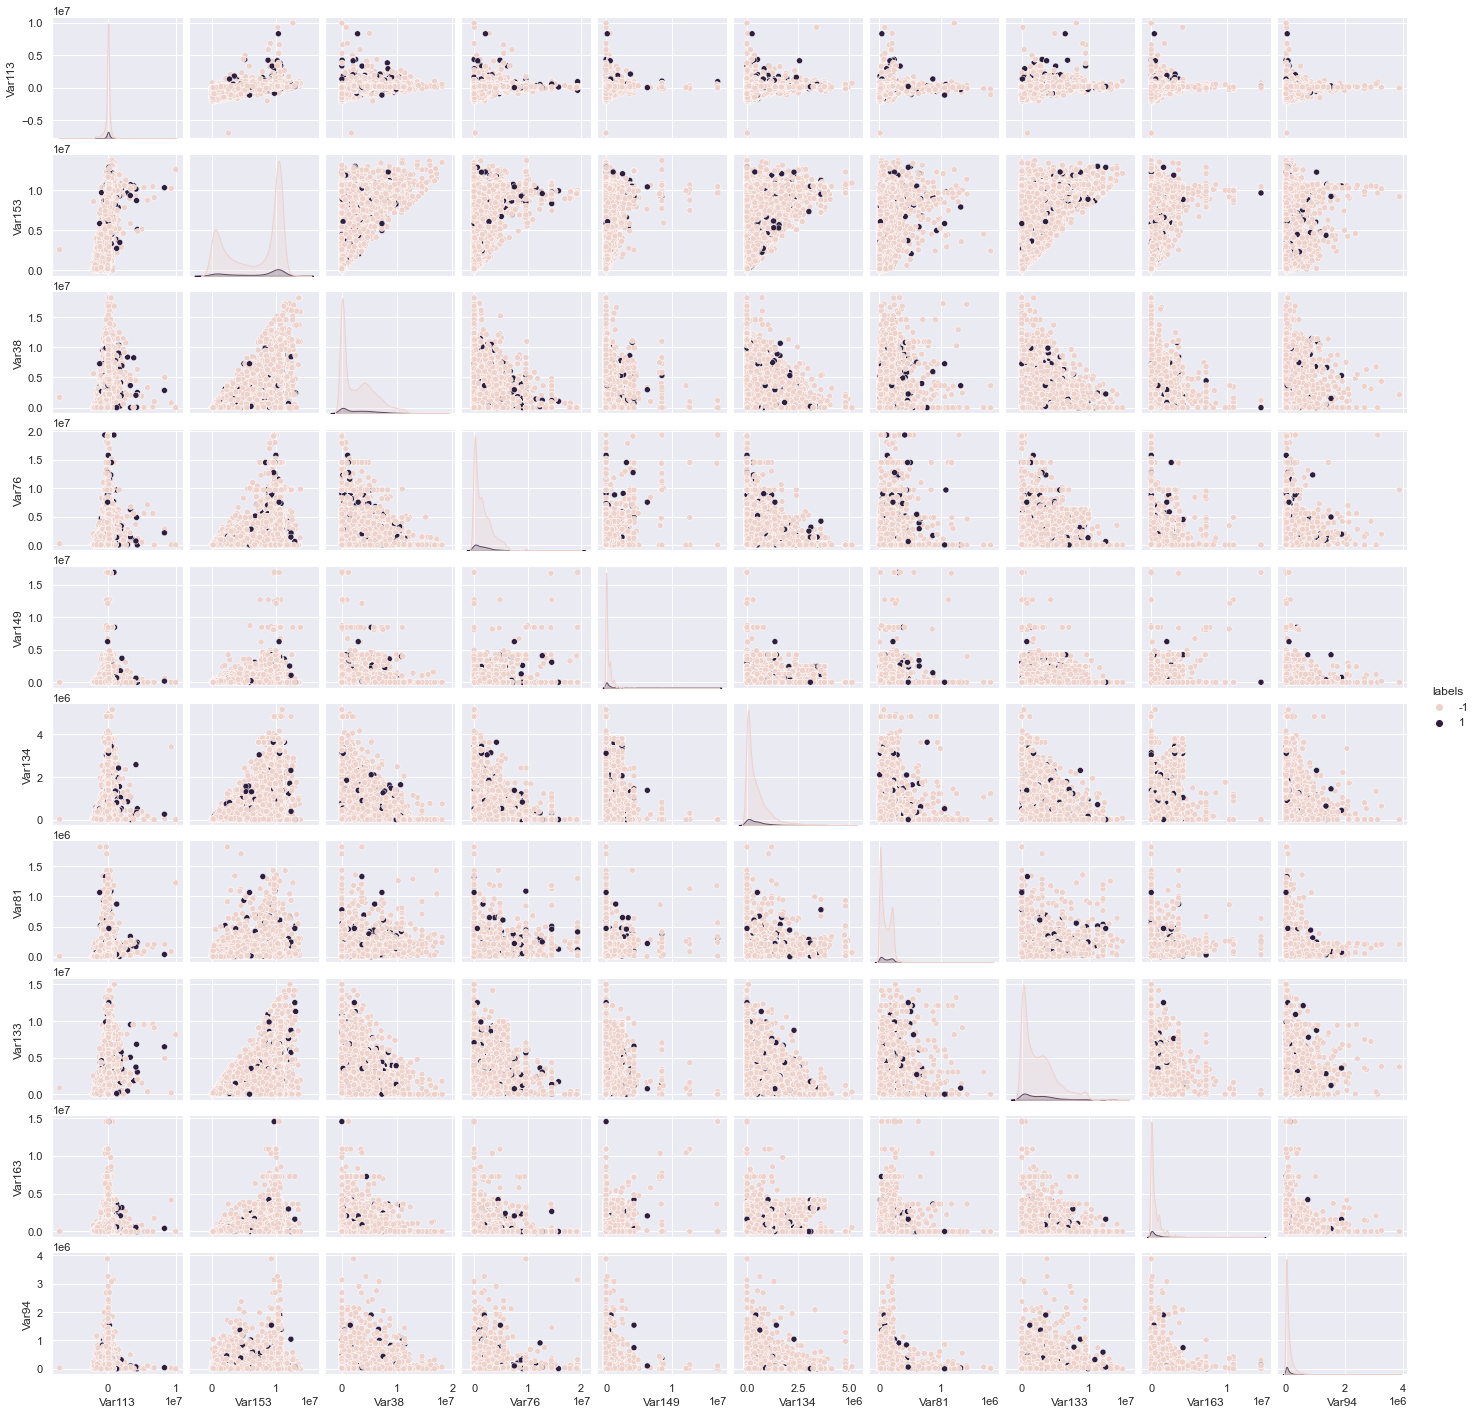

In [113]:
# топ 20 очень долго считалось на моём ноуте, (можно сказать, зависало и не визуализировало) поэтому удалось только 10..
columns = correlations.feature.iloc[:10]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(num_data[columns].dropna(), hue="labels", height=2)



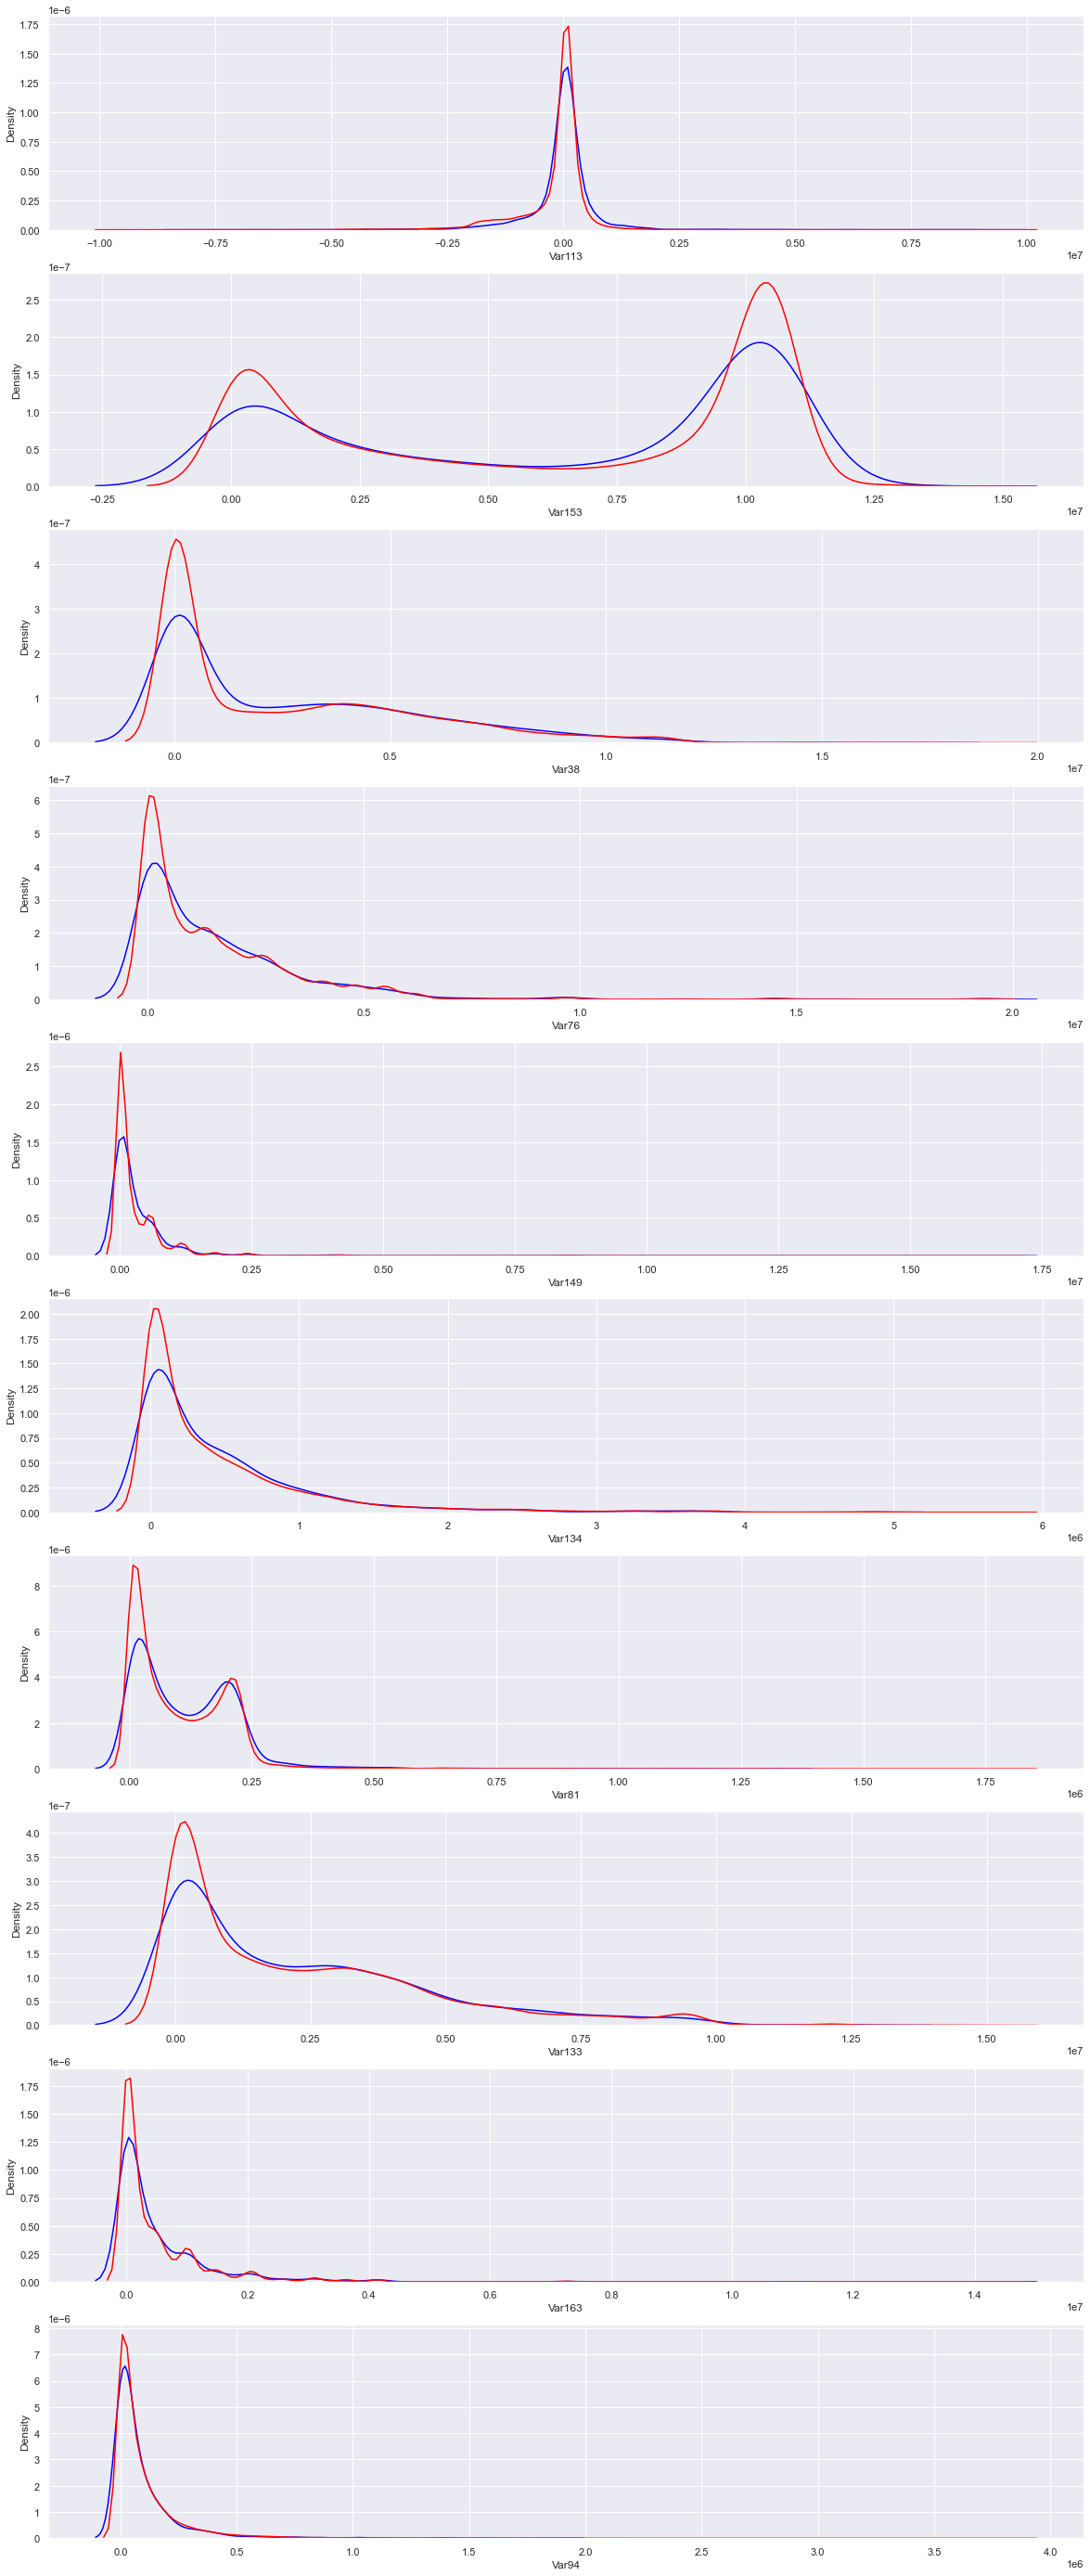

In [114]:
fig, axs = plt.subplots(10, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(num_data[column][num_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(num_data[column][num_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [130]:
np.random.RandomState(42)
random_features = np.random.randint(40, size = 10)
columns[len(columns)] = ("labels")
columns


5      Var24
13     Var72
29    Var132
26    Var123
8      Var35
17     Var78
11    labels
33    Var143
40    Var181
39    Var173
10     Var44
Name: feature, dtype: object

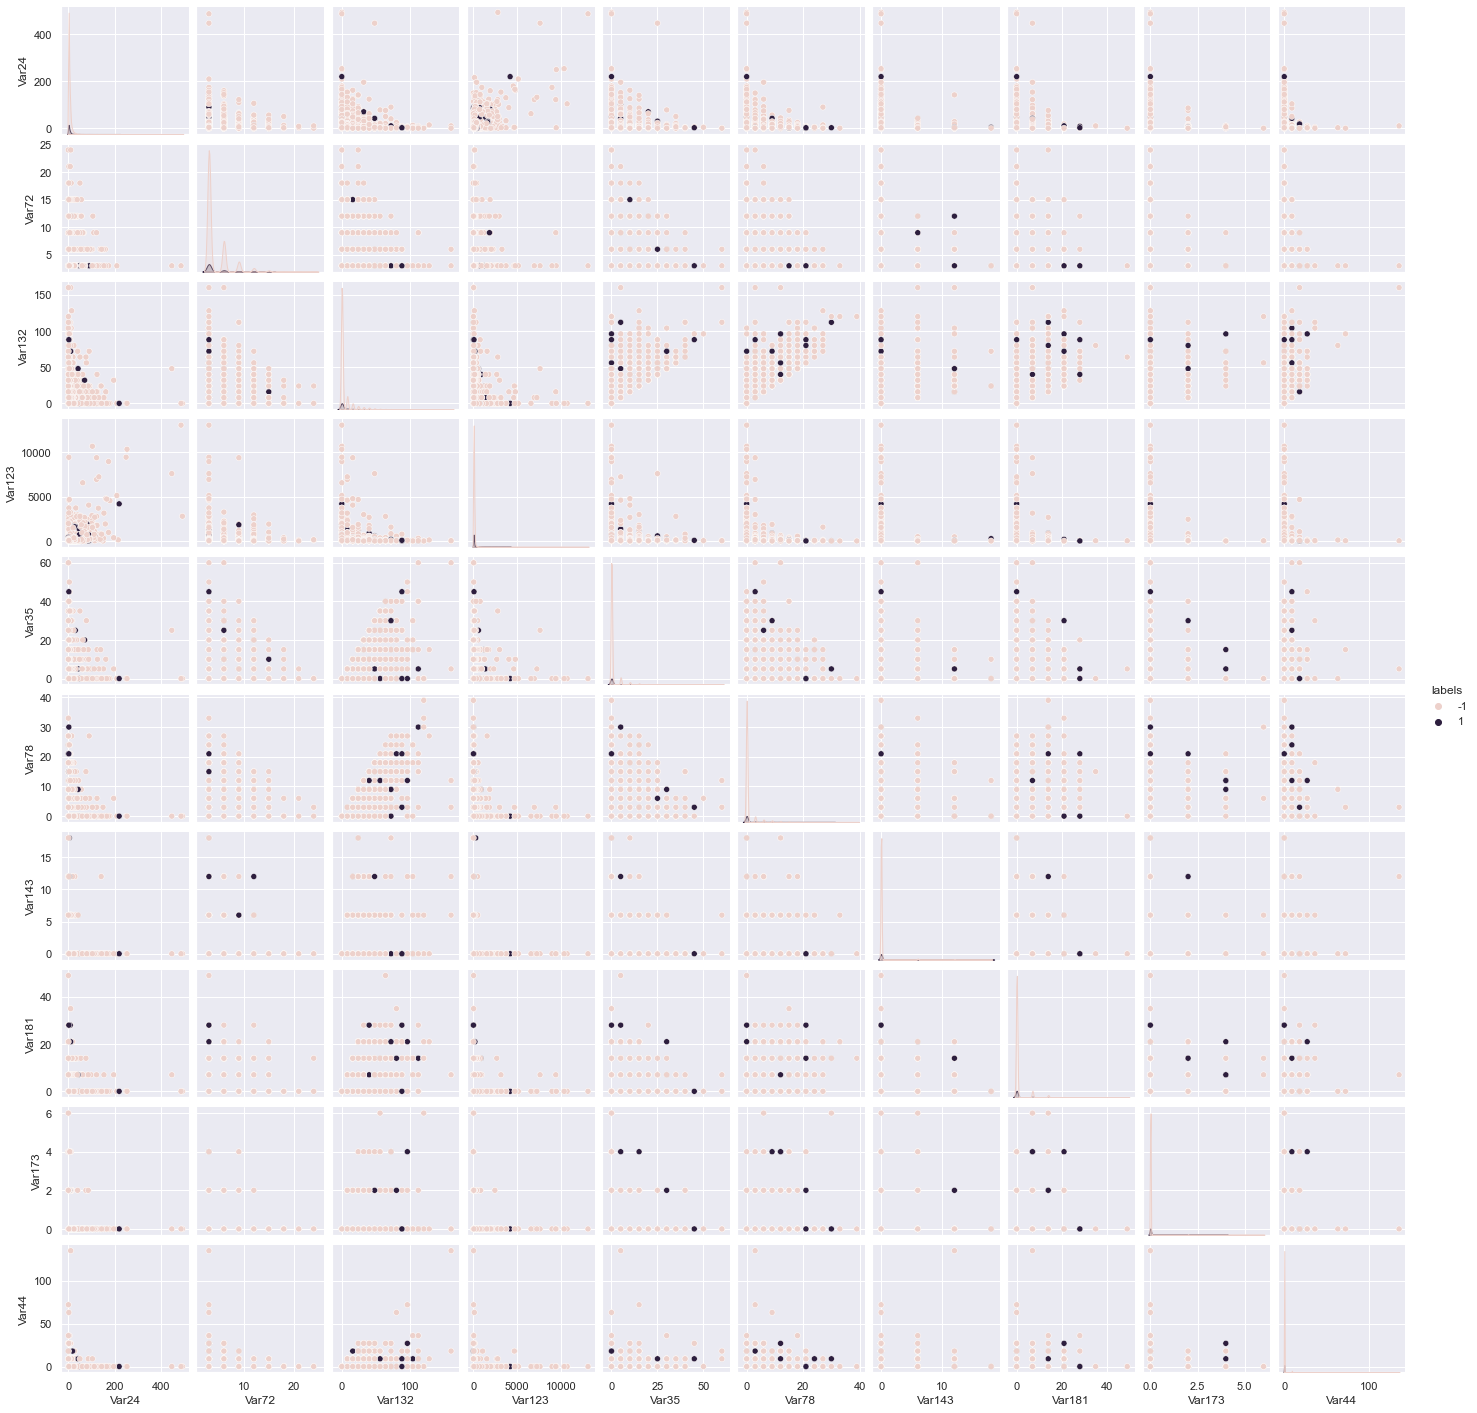

In [131]:
sns_plot = sns.pairplot(num_data[columns], hue="labels", height=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


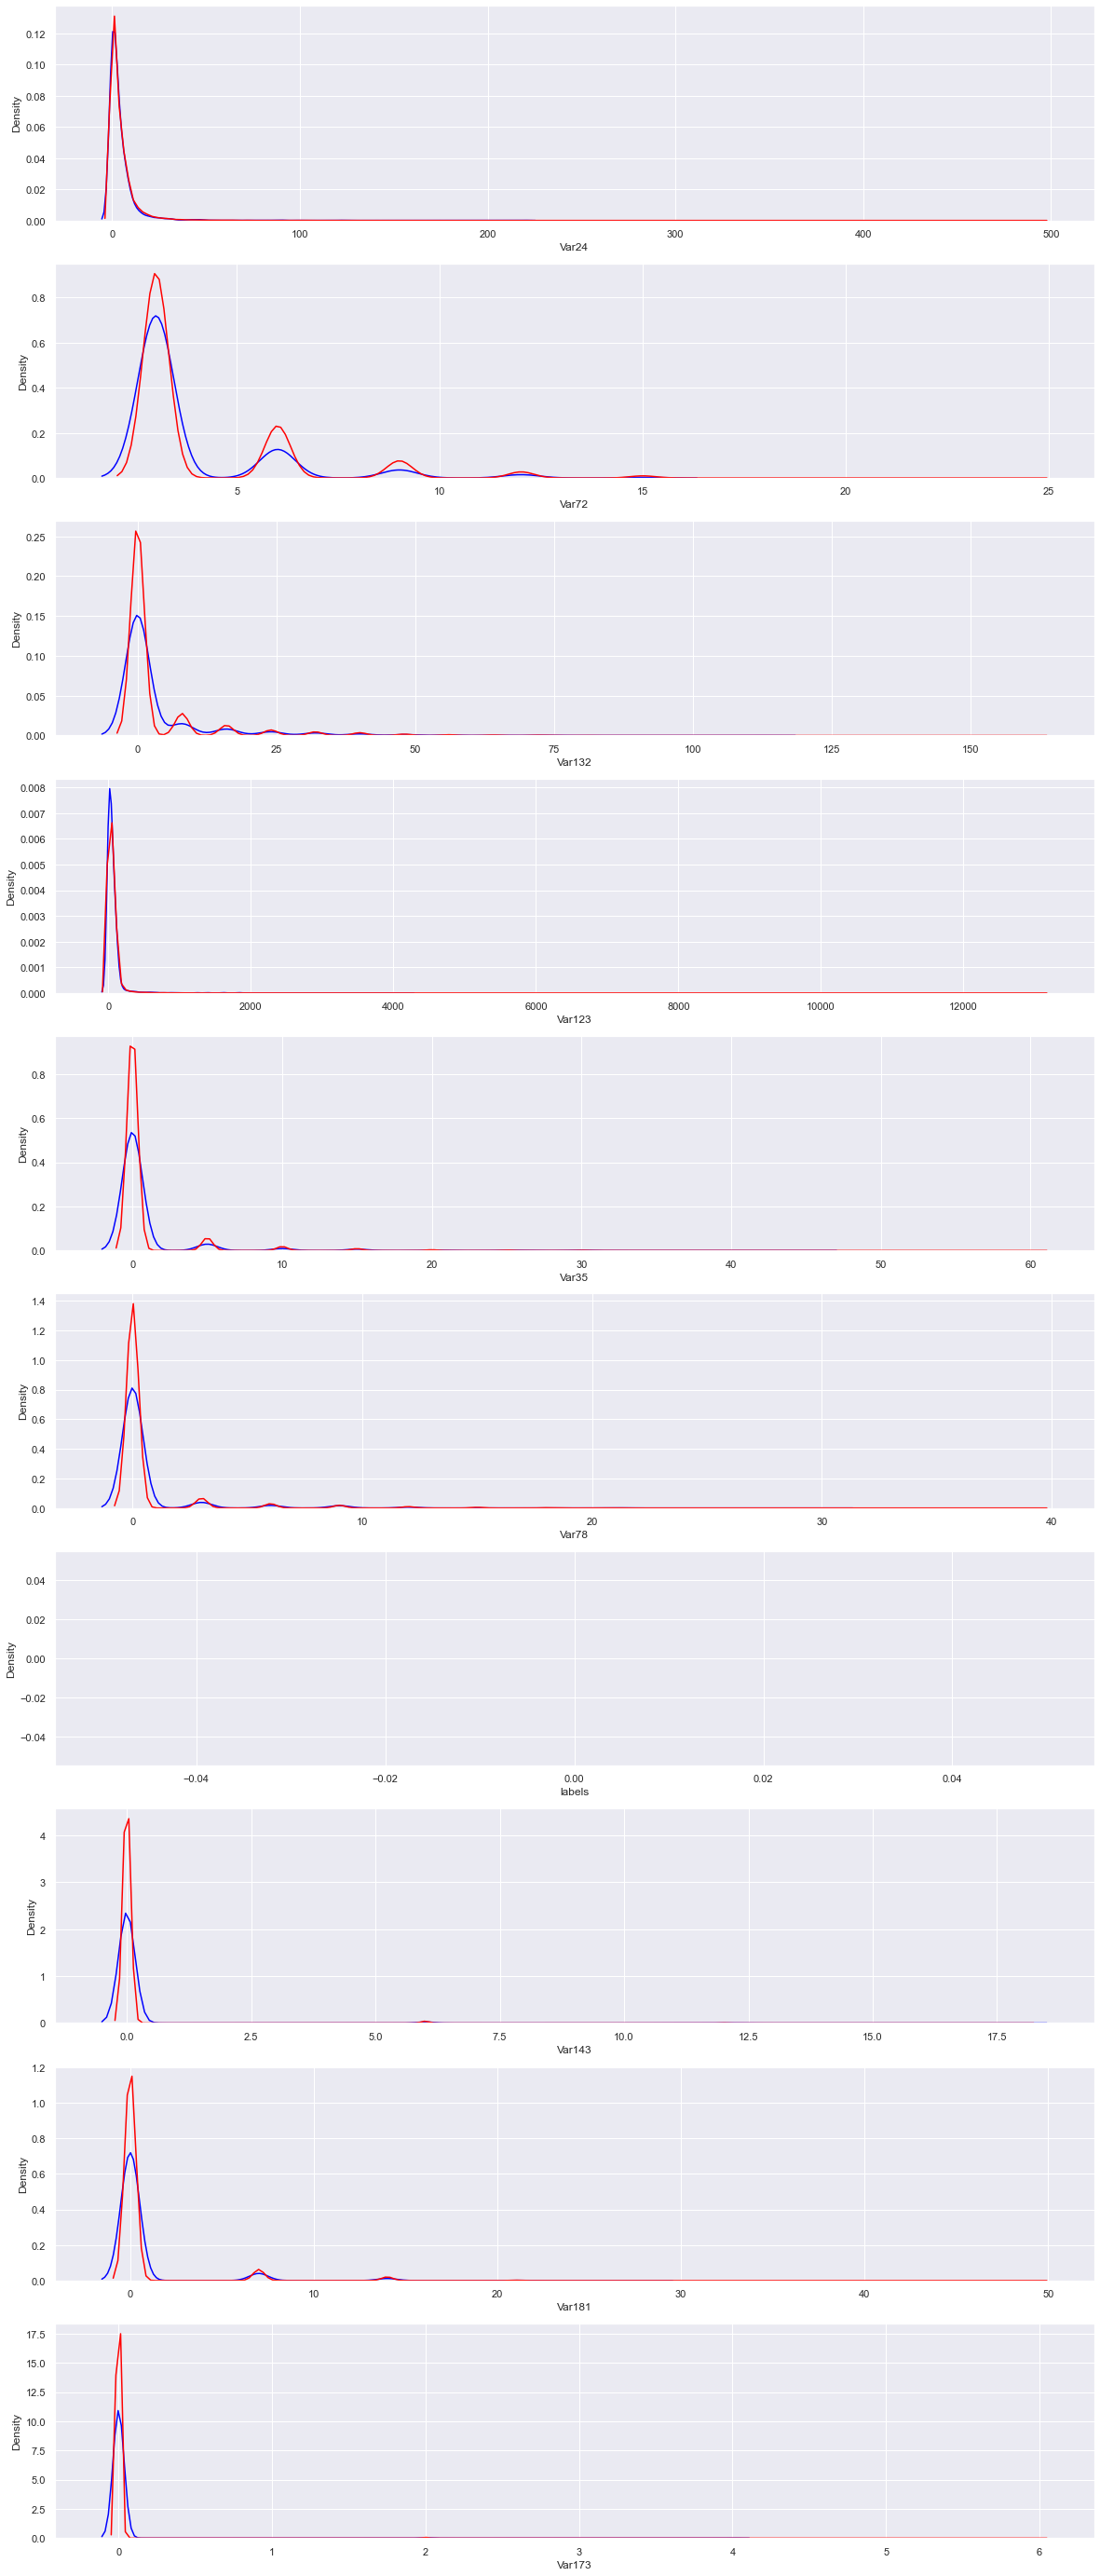

In [132]:
fig, axs = plt.subplots(10, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(num_data[column][num_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(num_data[column][num_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

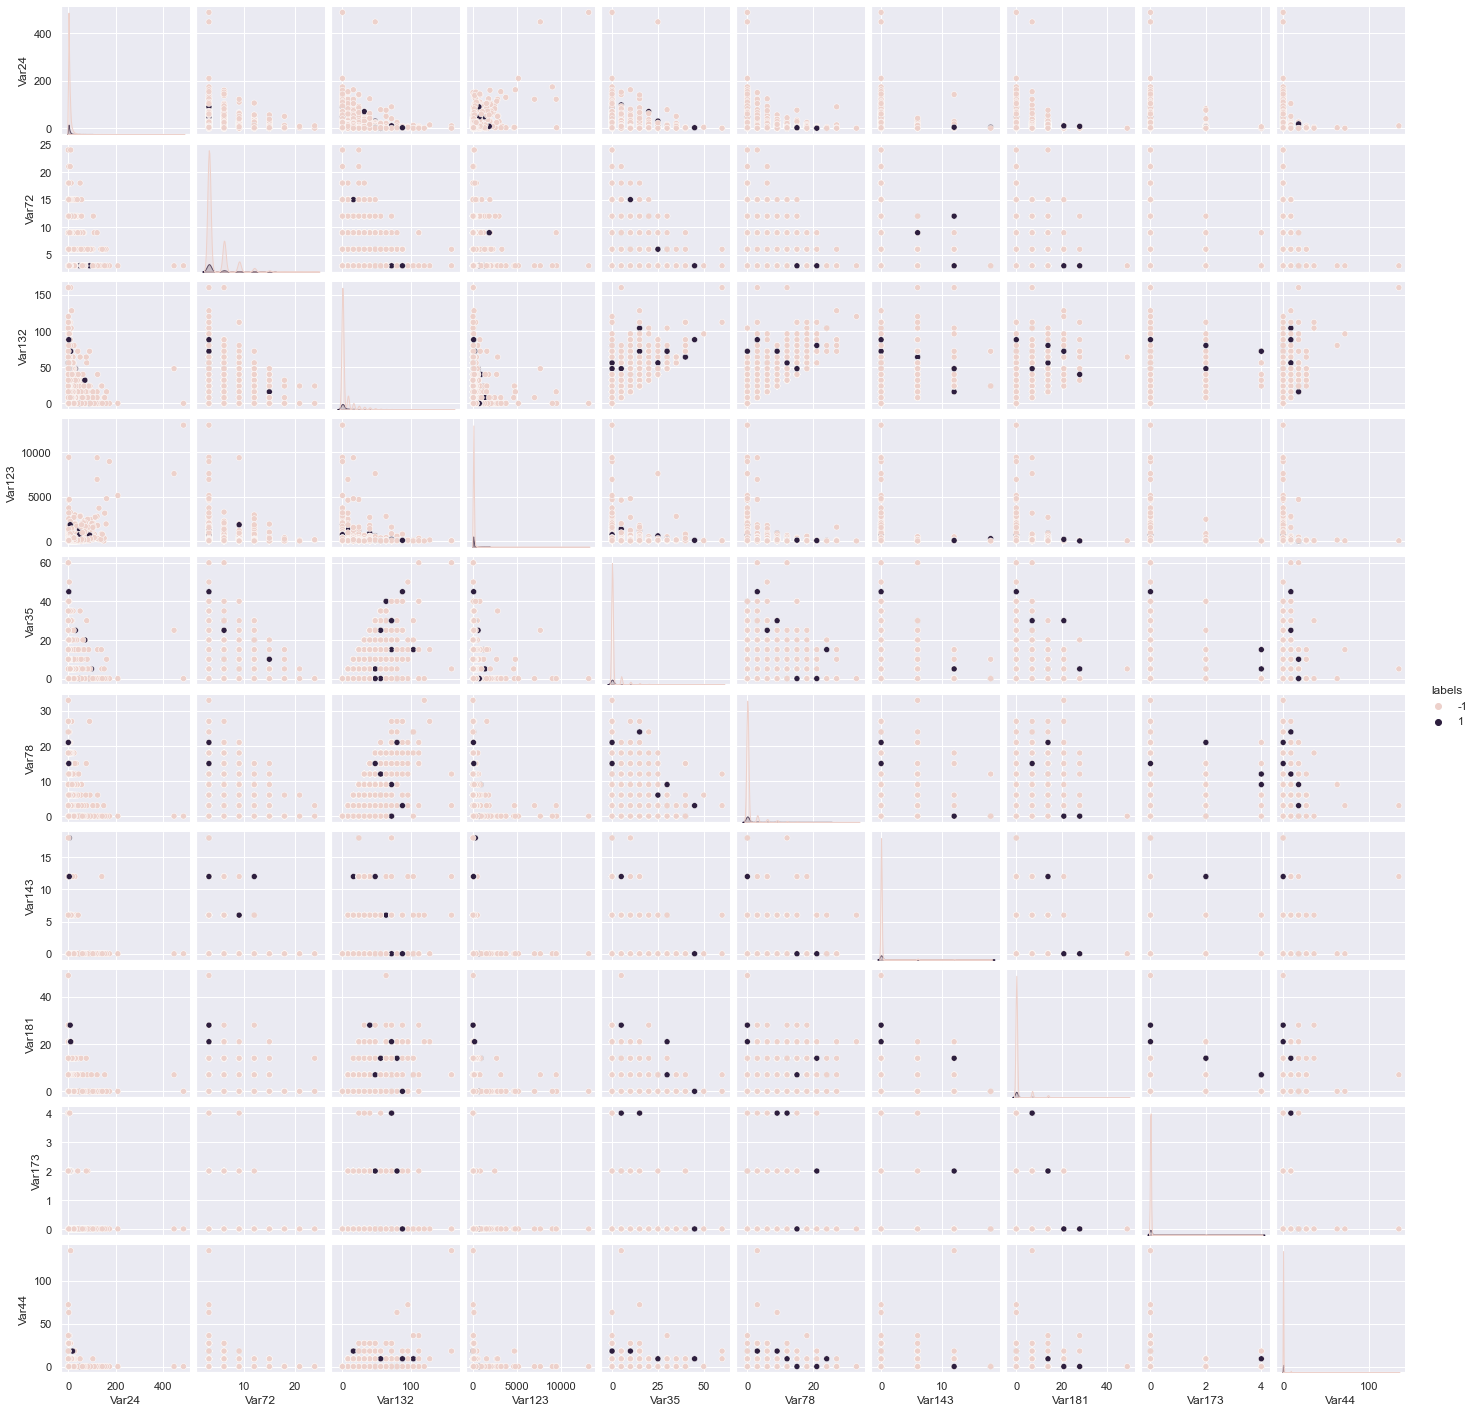

In [121]:
columns = correlations.feature.iloc[len(correlations)-11:]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(num_data[columns].dropna(), hue="labels", height=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


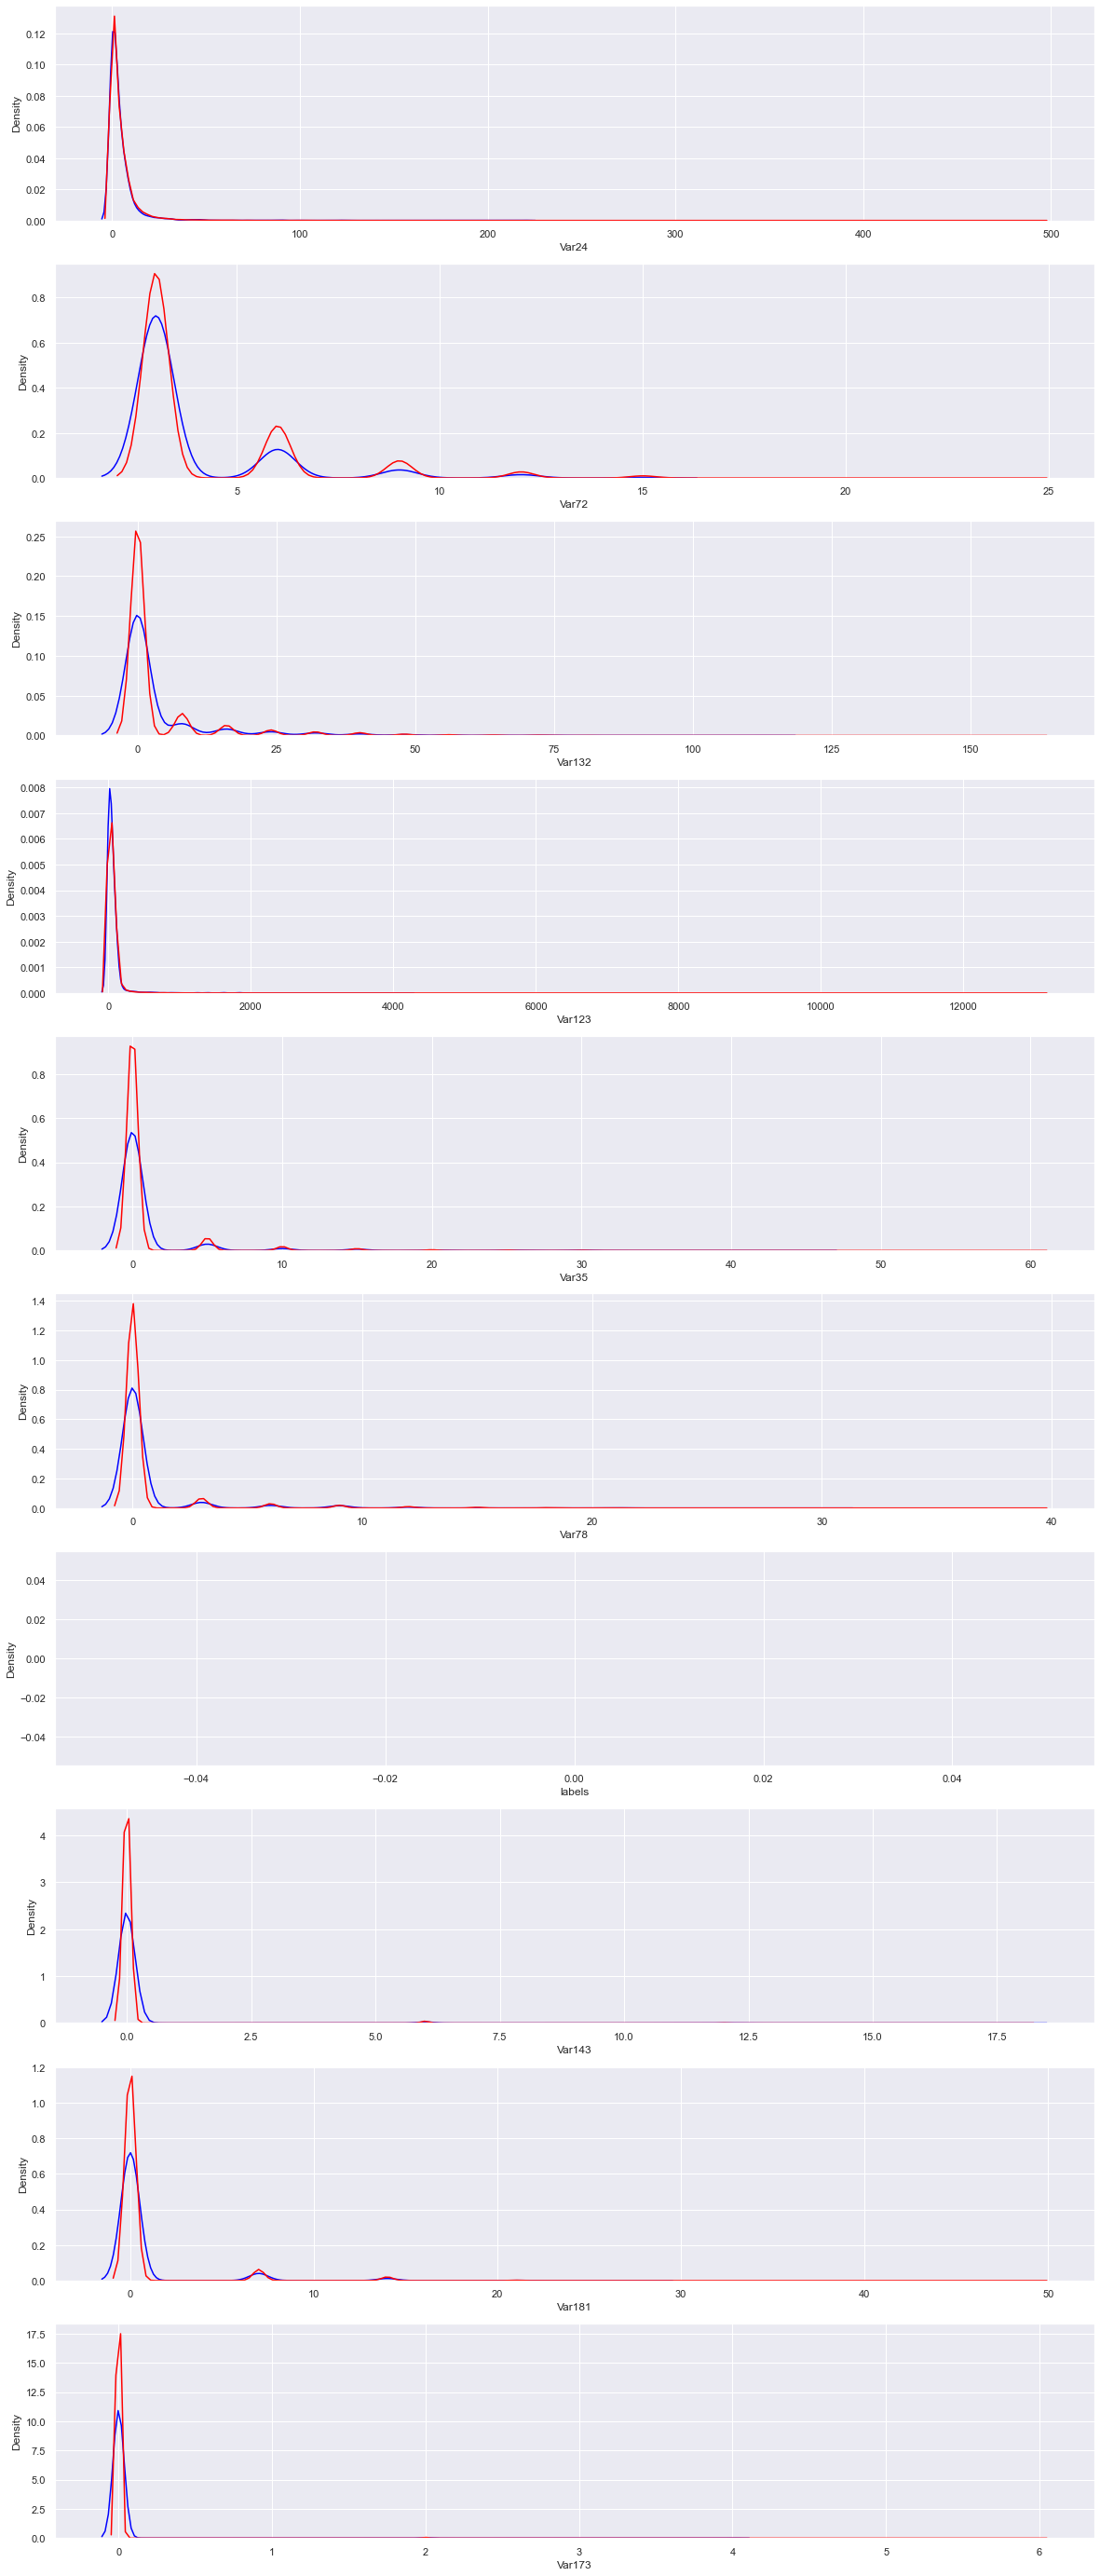

In [122]:
fig, axs = plt.subplots(10, figsize = (20,50))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(num_data[column][num_data['labels'] == 1], ax = ax, color = "blue", label = str(column)+" label = 1")
    sns.kdeplot(num_data[column][num_data['labels'] == -1], ax = ax, color = "red", label = str(column)+" label = -1")

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

#### 1) У множества признаков в данных имеются пропуски. В тех числовых признаках, у которых мало пропусков, видны отличия в распределении плотности по целевой переменной (близкое к нормальному и бимодальное в основном, но характер всё равно даже в этих категориях различается), значит признаки в массе не коллинеарны друг другу, а значит полезны при моделировании. 
#### 2) Некоторые числовые признаки можно отнести к категориальным, из-за однородности значений внутри признака (мало уникальных значений).
#### 3) Наибольший вклад в модель окажут большинство числовых переменных, в которых небольшое число пропусков. 
#### 4) Наибольший вклад в модель окажут числовые переменные, в которых большое число пропусков, и большинство категориальных признаков.
#### 5) Отбор признаков будет полезен для построения моделей.